# Programming for Data Science and Artificial Intelligence

## Supervised Learning - Classification - Logistic Regression - Multinomial

### Readings: 
- [GERON] Ch4
- [VANDER] Ch5
- [HASTIE] Ch4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Multinomial Logistic Regression

This is logistic regression when number of classes are more than 2.

### Scratch

**Implementation steps:**
    
The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{Y}$ and $\mathbf{W}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{Y}$ -> $(m, k)$
        - $\mathbf{W}$ -> $(n, k)$
        - where $k$ is number of classes
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict using the softmax function
   $$ h = \mathsf{P}(y = a \mid \theta) = \frac{e^{\theta^{T}_ax}}{\Sigma_{i=1}^{k} e^{\theta_k^{T}x}}$$
   --->why this function?<----
   - First, mathematically, this is just an extension of the sigmoid formula for multi-class classification
   - $e$ will always give non-negative outputs which helps, since probability is never negative
   - $e$ has a similar effect as argmax, which will turn larger input to larger outputs.
   - $e$ is super easy to differentiate, because derivative of $e$ is $e$
   - $e$ nicely cancel out the $\log$ in the cross entropy loss (see below)
   - By dividing, it make sure all the probability adds up to one.  You can think the softmax function as some form of normalization.   Why not normalization?  Because normalization cares only about proportion, while softmax reacts to change in scale better.

In [15]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

X = np.array([[1, 2, 3],
             [2, 4, 5]])

print("X: ", X.shape)  #(m, n) two samples, three features.  We ignore the y-intercept

Y = np.array([[0, 0, 1, 0],
              [1, 0, 0, 0]])  #(m, k) let's say four classes

print("Y: ", Y.shape)

W = np.array([[1, 2, 3, 4],
              [2, 3, 1, 0],
              [1, 2, 5, 1],
              ])  #(n, k)  three features, four classes

print("W: ", W.shape)

print("X @ W:",  X @ W)  #X @ W should be the same shape as our y

print("softmax(X @ W):", softmax(X@W))

np.set_printoptions(suppress=True)
print("Try to confirm it adds up to 1:", softmax(X@W).sum(axis=1))

print("if I want to know which one is the answer, use argmax: ", np.argmax(softmax(X@W), axis=1))

from sklearn.preprocessing import normalize
print("normalization(X @ W):", normalize(X@W))

X:  (2, 3)
Y:  (2, 4)
W:  (3, 4)
X @ W: [[ 8 14 20  7]
 [15 26 35 13]]
softmax(X @ W): [[0.00000613 0.0024726  0.99751901 0.00000225]
 [0.         0.00012339 0.9998766  0.        ]]
Try to confirm it adds up to 1: [1. 1.]
if I want to know which one is the answer, use argmax:  [2 2]
normalization(X @ W): [[0.30044631 0.52578104 0.75111577 0.26289052]
 [0.31311215 0.54272772 0.73059501 0.27136386]]


3. Calculate the loss using the cross entropy loss
    $$J = -\sum_{i=1}^m y^{(i)}\log(h^{(i)})$$

In [3]:
print("Y: ", Y)
print("h: ", softmax(X@W))
print("log: ", Y * np.log(softmax(X@W)))
print("log loss: ", -(Y * np.log(softmax(X@W))))
print("sum of log loss: ", np.sum(-(Y * np.log(softmax(X@W)))))

Y:  [[0 0 1 0]
 [1 0 0 0]]
h:  [[0.00000613 0.0024726  0.99751901 0.00000225]
 [0.         0.00012339 0.9998766  0.        ]]
log:  [[ -0.          -0.          -0.00248407  -0.        ]
 [-20.0001234   -0.          -0.          -0.        ]]
log loss:  [[ 0.          0.          0.00248407  0.        ]
 [20.0001234   0.          0.          0.        ]]
sum of log loss:  20.00260747339262


4. Calculate the gradient of theta of feature $j$ based on the loss function $J$
    - The gradient is defined as
       $$\frac{\partial J}{\partial \theta_j} = \sum_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
    - This gradient can be derived from the following simple example:
        - Suppose given 2 classes (k = 2) and 3 features (n = 3), we have the loss function as
       $$ J = -y_1 \log h_1 - y_2 \log h_2 $$
       where $h_1$ and $h_2$ are
       $$ h_1 = \frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)} $$
       $$ h_2 = \frac{\exp(g_2)}{\exp(g_1)+\exp(g_2)} $$
       where $g_1$ and $g_2$ are
       $$ g_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3 $$
       $$ g_2 = w_{12}x_1 + w_{22}x_2 + w_{32}x_3  $$
       where in $w_{ij}$, $i$ stands for feature and $j$ stands for class 
    - For example, to find the gradient of $J$ in respect to $w_{21}$, we simply can use the chain rule (or backpropagation) to calculate like this:
       $$ \frac{\partial J}{\partial w_{21}} = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}$$
   - If we know each of them, it is easy, where
       $$\frac{\partial J}{\partial h_{1}} = -\frac{y_1}{h_1}$$
       $$\frac{\partial J}{\partial h_{2}} = -\frac{y_2}{h_2}$$
       $$\frac{\partial h_{1}}{\partial g_{1}} = \frac{\exp(g_{1})}{\exp(g_{1}) + \exp(g_{2})} - (\frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)})^2 = h_1 (1 - h_1)$$
       $$\frac{\partial h_{2}}{\partial g_{1}} = \frac{-exp(g_2)exp(g_1)}{(\exp(g_1) + \exp(g_2)^2} = -h_2h_1$$
       $$\frac{\partial g_1}{\partial w_{21}} = x_2$$
    - For those who forgets how to do third and fourth, recall that the quotient rule
        $$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$
    - Putting everything together, we got
$$
\begin{aligned}
\frac{\partial J}{\partial w_{21}} &= \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}\\
&= -\frac{y_1}{h_1} * h_1 (1 - h_1) * x_2 + -\frac{y_2}{h_2} * -h_2h_1 * x_2 \\
&= x_2 (-y_1 + y_1h_1 + y_2h_1)\\
&= x_2 (-y_1 + h_1(y_1 + y_2))\\
&= x_2 (h_1 - y_1)\\
\end{aligned}
$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### Putting everything together

In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

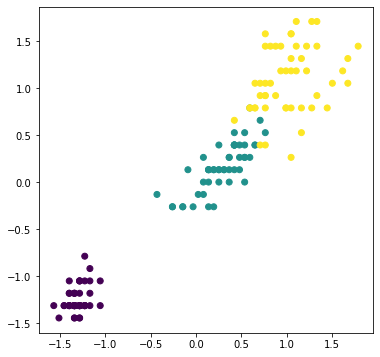

In [5]:
# Step 1.1 (optional): Visualize our data

# your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [6]:
# Step 2: Fit your data

def logistic_regression_GD(X, Y, k, n, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    W = np.random.rand(n, k)
    l_rate = 0.01
    for i in range(max_iter):
        cost, grad =  gradient(X, Y, W)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        W = W - l_rate * grad
    return W, i

# for those who tend to feel overwhelmed with lots of code
# I recommend you to write each part of the code separately as function
# it helps!
def gradient(X, Y, W):
    m = X.shape[0]
    h = h_theta(X, W)
    cost = - np.sum(Y * np.log(h)) / m
    error = h - Y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(theta_t_x):
    return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        
def h_theta(X, W):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
    return softmax(X @ W)

W, i = logistic_regression_GD(X_train, Y_train_encoded, k, X_train.shape[1], max_iter=5000)

Cost at iteration 0 1.2165698831321565
Cost at iteration 500 0.08503928446436061
Cost at iteration 1000 0.07540368804940104
Cost at iteration 1500 0.07208374635871027
Cost at iteration 2000 0.07051629843305525
Cost at iteration 2500 0.06965815235758366
Cost at iteration 3000 0.06914405970854572
Cost at iteration 3500 0.06881605728529293
Cost at iteration 4000 0.0685964053247815
Cost at iteration 4500 0.06844333824381736


In [7]:
from sklearn.metrics import classification_report

yhat = np.argmax(h_theta(X_test, W), axis=1)
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.94      0.94        16
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Average precision score.  Recall that in a multiclass format, we have to calculate for each class, and then take the average.  And before we do that, we need to binarize our y.

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized   = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.9011284722222223
Class 2 score:  0.8486685032139577


### Sklearn

In [9]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

model = LogisticRegression(multi_class="ovr")  #set this to multiclass="ovr" to perform multinomial logistic

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized   = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.8905982905982905
Class 2 score:  0.8947368421052632
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.85      0.92        13
           2       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.95        45



### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.